In [2]:
# Import Libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Seed
seed = 42
rng = np.random.RandomState(seed)

# Set path variables

csvPath ="./../../CV101/datasets/facial_keypoint_identification/"
imagePath=csvPath+'images/'
dataFile='facial_keypoint_identification.csv'



In [3]:
! pwd
! ls ./../../CV101/datasets/facial_keypoint_identification/

/home/jovyan/work/AI-ML-BlackBelt-AnalyticsVidhya/Computer Vision
facial_keypoint_identification.csv  images


In [4]:
print(csvPath + dataFile)

./../../CV101/datasets/facial_keypoint_identification/facial_keypoint_identification.csv


In [5]:
# Read the data
data = pd.read_csv(csvPath + dataFile)
data.head()


,image_name,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y
0,0.jpg,66,39,30,36
1,1.jpg,64,34,29,33
2,2.jpg,65,34,30,34
3,3.jpg,65,37,32,37
4,4.jpg,66,39,32,38


The shape of the is (96, 96, 3)


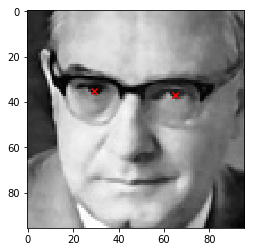

In [11]:

# Read random data and plot it's image
idx = rng.choice(data.index)
img = plt.imread(imagePath + data.image_name.iloc[idx])
fig = plt.figure()
plt.imshow(img)

# Plot Target
plt.scatter(data.left_eye_center_x.iloc[idx],data.left_eye_center_y.iloc[idx],marker='x',c='r')
plt.scatter(data.right_eye_center_x.iloc[idx],data.right_eye_center_y.iloc[idx],marker='x',c='r')


# Print the shape of image
print('The shape of the is',img.shape)
plt.show()



In [22]:
# Compute mean_squared_error of the Eyes 
from sklearn.metrics import mean_squared_error

error_left_x = mean_squared_error(data.left_eye_center_x.values,np.full(data.left_eye_center_x.values.shape,data.left_eye_center_x.mean()))
error_left_y = mean_squared_error(data.left_eye_center_y.values,np.full(data.left_eye_center_y.values.shape,data.left_eye_center_y.mean()))

error_right_x = mean_squared_error(data.right_eye_center_x.values,np.full(data.right_eye_center_x.values.shape,data.right_eye_center_x.mean()))
error_right_y = mean_squared_error(data.right_eye_center_y.values,np.full(data.right_eye_center_y.values.shape,data.right_eye_center_y.mean()))


error = ( error_left_x*error_left_x +  error_left_y*error_left_y +  error_right_x*error_right_x + 
error_right_y*error_right_y  )/4

In [23]:
error

104.5789947402131